In [1]:
credit_crd<-read.csv("D:\\R_TXT_MINE_DATA\\creditcard.csv",header = TRUE,
                   stringsAsFactors = FALSE,
                   strip.white = TRUE ,
                   sep = ',')

#checking overall dataset and coverting 'class' as factor variables 
str(credit_crd)
credit_crd$Class = as.factor(credit_crd$Class)
str(credit_crd$Class)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [2]:
#Excluding 'Time' variable from dataset for further analysis
credit_crd = credit_crd[,2:31]
head(credit_crd)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,0.09079417,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,-0.16697441,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,0.20764287,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,-0.05495192,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,0.75307443,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,-0.37140720,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [3]:
#To overcome the imbalance in dataset I'll apply oversampling 
#Checking imbalance in the dataset
summary(credit_crd$Class)
prop.table(table(credit_crd$Class)) #99.8% proper transaction, 0.2% fraud. 

0      1 
284315    492


          0           1 
0.998272514 0.001727486 

In [4]:
#install.packages("ROSE")
#Implementing oversampling
library(ROSE)
credit_crd = ovun.sample(Class~., data = credit_crd, method = 'over', 
                      N = 2*284315, seed = 1234)$data
summary(credit_crd$Class)

Loaded ROSE 0.0-3



0      1 
284315 284315

In [5]:
# Feature Scaling for 'amount'
library(scales)
credit_crd[,29] = rescale(credit_crd[,29], to = c(0,1))
head(credit_crd$Amount)


[1] 0.0058237931 0.0001047053 0.0147389219 0.0048071010 0.0027242834
[6] 0.0001428507

In [6]:
# Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)
split = sample.split(credit_crd$Class, SplitRatio = 0.8)
training = subset(credit_crd, split == TRUE)
test = subset(credit_crd, split == FALSE)
summary(training$Class)
summary(test$Class)


0      1 
227452 227452

0     1 
56863 56863

In [7]:
#fitting random forest classifier model 
#install.packages("randomForest")

library(randomForest)
set.seed(123)
credit_crd_rndm = randomForest(x = training[-30],
                          y = training$Class,
                          ntree = 50)

# Predicting the Test set results
y_pred = predict(credit_crd_rndm, newdata = test[-31])


randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [12]:
# Making the Confusion Matrix
library(caret)
confusionMatrix(test$Class,y_pred)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 56858     5
         1     0 56863
                                     
               Accuracy : 1          
                 95% CI : (0.9999, 1)
    No Information Rate : 0.5        
    P-Value [Acc > NIR] : < 2e-16    
                                     
                  Kappa : 0.9999     
 Mcnemar's Test P-Value : 0.07364    
                                     
            Sensitivity : 1.0000     
            Specificity : 0.9999     
         Pos Pred Value : 0.9999     
         Neg Pred Value : 1.0000     
             Prevalence : 0.5000     
         Detection Rate : 0.5000     
   Detection Prevalence : 0.5000     
      Balanced Accuracy : 1.0000     
                                     
       'Positive' Class : 0          
                                     


Call:
roc.default(response = test$Class, predictor = as.numeric(y_pred))

Data: as.numeric(y_pred) in 56863 controls (test$Class 0) < 56863 cases (test$Class 1).
Area under the curve: 1


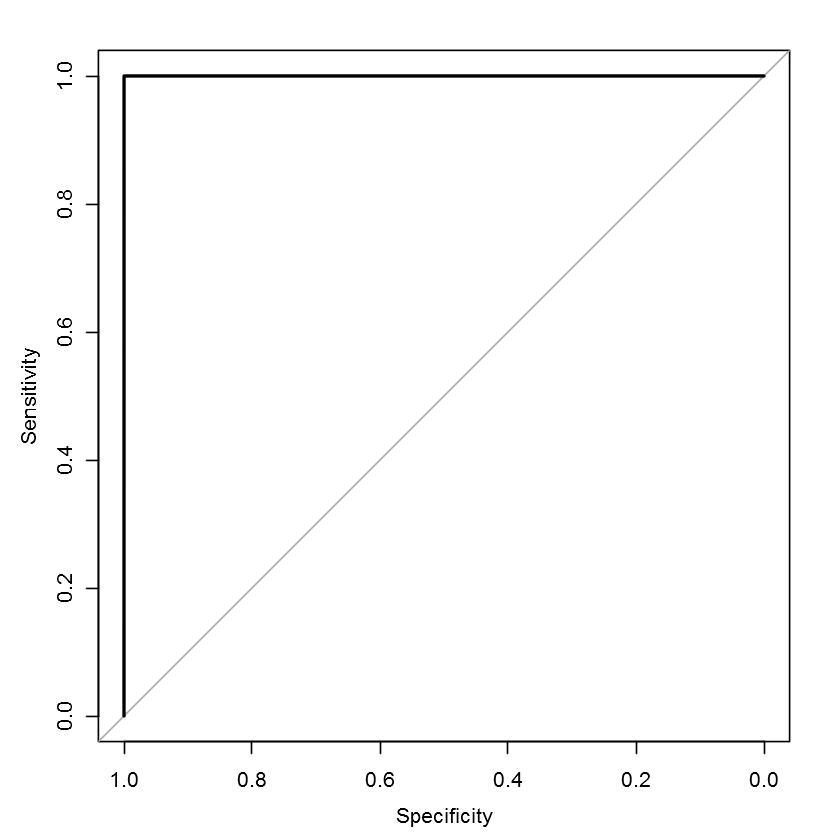

In [13]:
#install.packages("pROC")
library(pROC)
roc_graph <-roc(test$Class,as.numeric(y_pred))
print(roc_graph)
plot.roc(roc_graph)


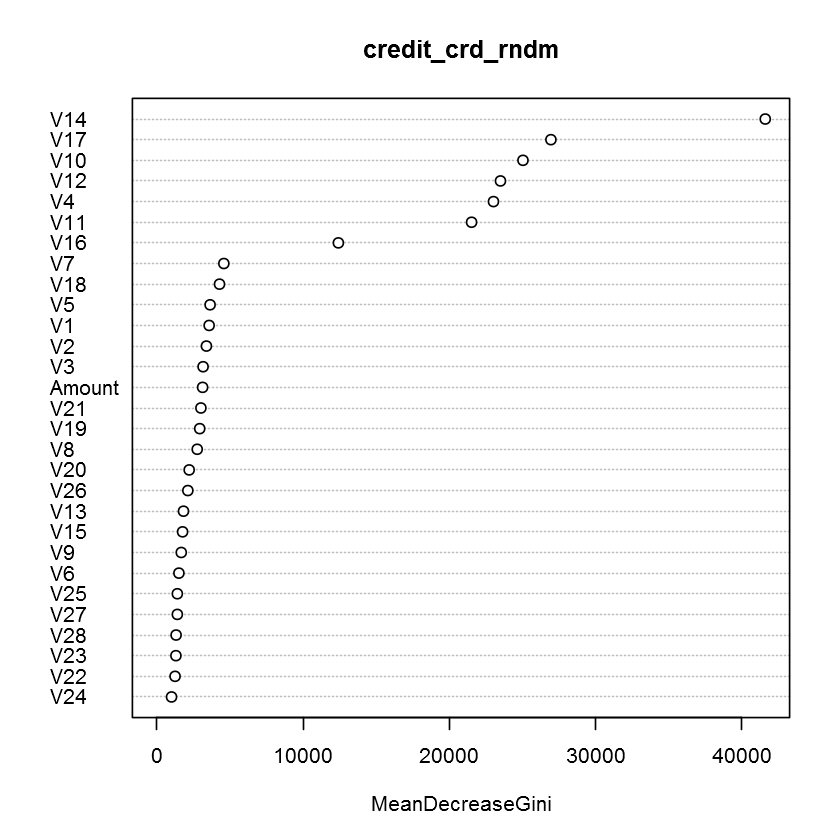

In [14]:
#importance(rf)
varImpPlot(credit_crd_rndm)

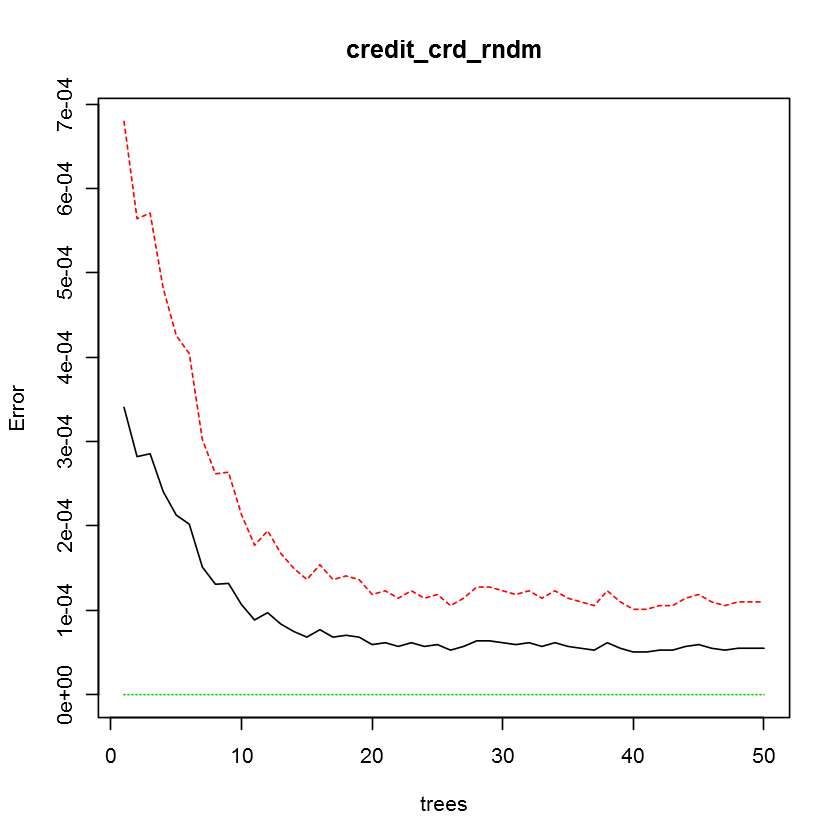

In [15]:
plot(credit_crd_rndm)

Area under the curve: 1


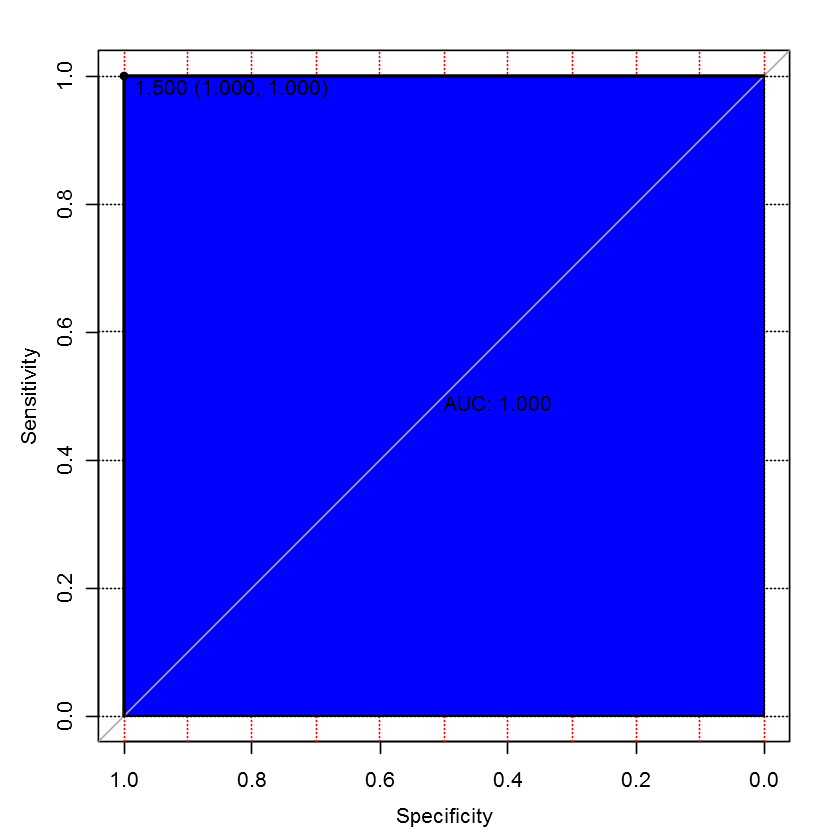

In [21]:
auc_value<-auc(roc_graph)
print(auc_value)
plot(roc_graph, print.auc=TRUE, auc.polygon=TRUE, grid=c(0.1, 0.2),
     grid.col=c("red", "black"), max.auc.polygon=TRUE,
     auc.polygon.col="blue", print.thres=TRUE)

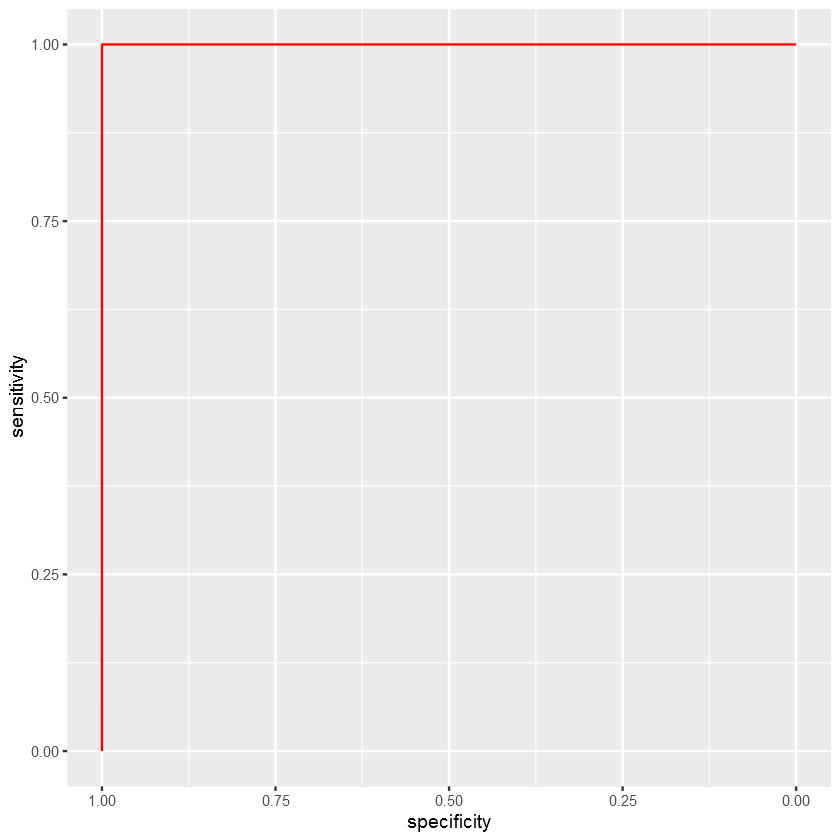

In [22]:
library(ggplot2)

ggroc(roc_graph, colour = "red")